In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('initial_table.csv', sep=';', encoding='cp1251', decimal=',')
df.head(5)

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,...,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN


In [3]:
# Убираем пробелы
df['СуммаЗаказаНаСайте'] = df['СуммаЗаказаНаСайте'].replace(r'\s+','',regex=True)
df['СуммаДокумента'] = df['СуммаДокумента'].replace(r'\s+','',regex=True)
df['СуммаСтроки'] = df['СуммаСтроки'].replace(r'\s+','',regex=True)
df['Цена'] = df['Цена'].replace(r'\s+','',regex=True)
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].replace(r'\s+','',regex=True)

# Запятые на точки
df['СуммаЗаказаНаСайте'] = df['СуммаЗаказаНаСайте'].replace(',','.',regex=True)
df['СуммаДокумента'] = df['СуммаДокумента'].replace(',','.',regex=True)
df['СуммаСтроки'] = df['СуммаСтроки'].replace(',','.',regex=True)
df['Цена'] = df['Цена'].replace(',','.',regex=True)
df['ЦенаЗакупки'] = df['ЦенаЗакупки'].replace(',','.',regex=True)

# From object to float
df['СуммаЗаказаНаСайте'] = pd.to_numeric(df['СуммаЗаказаНаСайте'],errors = 'coerce')
df['СуммаДокумента'] = pd.to_numeric(df['СуммаДокумента'],errors = 'coerce')
df['СуммаСтроки'] = pd.to_numeric(df['СуммаСтроки'],errors = 'coerce')
df['Цена'] = pd.to_numeric(df['Цена'],errors = 'coerce')
df['ЦенаЗакупки'] = pd.to_numeric(df['ЦенаЗакупки'],errors = 'coerce')

In [4]:
print(df.shape)
print(len(df.columns))
print(df.columns)

(691539, 38)
38
Index(['Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте', 'НовыйСтатус',
       'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки', 'ФормаОплаты',
       'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип', 'Номенклатура',
       'ТипТовара', 'Отменено', 'ПричинаОтмены', 'Количество', 'Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'МесяцДатыЗаказа', 'ГодДатыЗаказа',
       'ПВЗ_код', 'Статус', 'Гео', 'Маржа', 'СуммаУслуг', 'СуммаДоставки',
       'НомерСтроки', 'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте',
       'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент', 'ID_SKU',
       'ГородМагазина', 'МагазинЗаказа'],
      dtype='object')


In [5]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
СуммаЗаказаНаСайте,691539.0,4329.717877,5588.732189,0.00,1582.00,2758.00,5049.00,215962.00
СуммаДокумента,691539.0,3898.915398,5066.556170,0.00,1276.00,2510.00,4692.00,203576.00
Количество,691539.0,1.448073,2.031262,0.00,1.00,1.00,1.00,180.00
Цена,691539.0,825.235126,2205.210765,0.00,85.00,234.00,783.21,115900.00
СуммаСтроки,691539.0,887.451232,2272.539531,0.00,99.00,250.00,811.00,175500.00
ЦенаЗакупки,614626.0,675.889108,1711.031172,0.91,68.08,195.96,675.00,80384.37
МесяцДатыЗаказа,691539.0,3.509916,0.499902,3.00,3.00,4.00,4.00,4.00
НомерСтроки,691539.0,5.073237,6.855903,1.00,1.00,2.00,6.00,147.00
КоличествоПроданоКлиенту,691539.0,1.202589,1.935918,0.00,1.00,1.00,1.00,180.00


In [59]:
temp = df.isna().sum() 
temp1 = 100 * temp / len(df) 

df1 = pd.DataFrame(temp1) 
df1.rename(columns={df1.columns[0]: "%"}, inplace = True)
df1 = df1.sort_values("%", axis=0, ascending=False, inplace=False, na_position='last')
df1.reset_index(level=0, inplace=True)
df1.rename(columns={df1.columns[0]: "Категория", df.columns[1]: "%"}, inplace = True)

mass = df.agg(["nunique", (lambda x: x.nunique() / len(x) * 100), (lambda x: x.isin([0]).sum()), (lambda x: x.isin([0]).sum() / len(x) * 100), (lambda x: x.isna().sum()), 
               (lambda x: x.isna().sum() / len(x) * 100),]).transpose() 
mass.columns = ["Unique", "Percent unique", "Zeros", "Percent zeros", "NaNs", "Percent NaNs",] 
mass

,Unique,Percent unique,Zeros,Percent zeros,NaNs,Percent NaNs
Дата,28887.0,4.177205,0.0,0.000000,0.0,0.000000
ДатаДоставки,107.0,0.015473,0.0,0.000000,626.0,0.090523
НомерЗаказаНаСайте,178418.0,25.800136,0.0,0.000000,4.0,0.000578
НовыйСтатус,14.0,0.002024,0.0,0.000000,0.0,0.000000
СуммаЗаказаНаСайте,14316.0,2.070165,6.0,0.000868,0.0,0.000000
СуммаДокумента,14747.0,2.132490,25772.0,3.726760,0.0,0.000000
МетодДоставки,7.0,0.001012,0.0,0.000000,0.0,0.000000
ФормаОплаты,2.0,0.000289,0.0,0.000000,0.0,0.000000
Регион,508.0,0.073459,0.0,0.000000,5142.0,0.743559
Группа2,13.0,0.001880,0.0,0.000000,74686.0,10.799969


### Корреляция

In [60]:
df.corr() 

,СуммаЗаказаНаСайте,СуммаДокумента,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,НомерСтроки,КоличествоПроданоКлиенту
СуммаЗаказаНаСайте,1.000000,0.889645,0.050326,0.416263,0.424700,0.400253,-0.000397,0.272756,0.004678
СуммаДокумента,0.889645,1.000000,0.064654,0.354166,0.373858,0.337605,-0.000237,0.284917,0.013843
Количество,0.050326,0.064654,1.000000,-0.068659,0.030338,-0.074190,-0.008380,0.026342,0.828853
Цена,0.416263,0.354166,-0.068659,1.000000,0.951314,0.982817,-0.021161,-0.140604,-0.074050
СуммаСтроки,0.424700,0.373858,0.030338,0.951314,1.000000,0.938812,-0.021290,-0.143937,0.004255
ЦенаЗакупки,0.400253,0.337605,-0.074190,0.982817,0.938812,1.000000,-0.022126,-0.170148,-0.073963
МесяцДатыЗаказа,-0.000397,-0.000237,-0.008380,-0.021161,-0.021290,-0.022126,1.000000,0.008955,-0.010375
НомерСтроки,0.272756,0.284917,0.026342,-0.140604,-0.143937,-0.170148,0.008955,1.000000,-0.000937
КоличествоПроданоКлиенту,0.004678,0.013843,0.828853,-0.074050,0.004255,-0.073963,-0.010375,-0.000937,1.000000


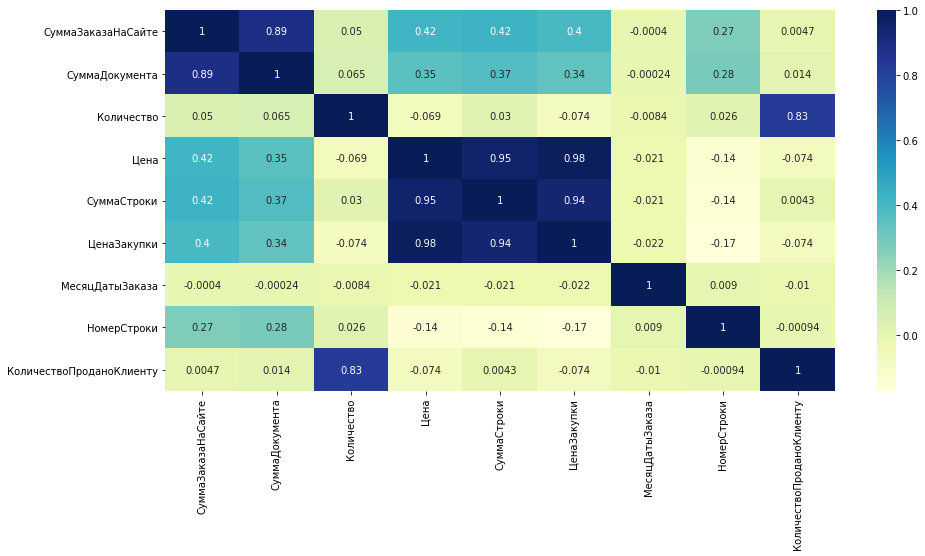

In [61]:
fig = plt.figure(figsize = (15, 7)) 
sns.heatmap(df.corr(), annot=True, cmap = 'YlGnBu'); 

### Большая корреляция у Цены с Сумма строки и Цена закупки. Так же, у Сумма Заказа на сайте и Сумма Документа.

### Чистка данных.

Убираем категорию "Доставка". 

In [6]:
df_delivary = df[(df['Номенклатура'] == 'Доставка') | (df['Группа2'] == 'Доставка')]
df = df[(df['Номенклатура'] != 'Доставка')]
df = df[(df['Группа2'] != 'Доставка')]

In [7]:
df = df[(df['Количество'] > 0)] 
df = df[(df['Отменено'] != 'Да')]
df = df[(df['СуммаЗаказаНаСайте'] != 0) | (df['СуммаДокумента'] != 0)]
df = df[(df['КоличествоПроданоКлиенту'] > 0)]

In [8]:
df['Регион'] = df['Регион'].fillna(df['ГородМагазина'])
df = df[(df['Регион'] != '0')]
df.loc[df['ГородМагазина'] == '0', 'ГородМагазина'] = 'ИнтернетДоставка'

In [9]:
df.shape

(431200, 38)

### Рассчитаем маржу.

In [10]:
# Маржа = Нов_СуммаСтроки - ЦенаЗакупки
df['Маржа'] = df['СуммаСтроки'] - df['ЦенаЗакупки']

### Все заказы.

In [11]:
df_all_orders = df.dropna(subset = ['Группа2'])
df_all_orders = df_all_orders.dropna(subset = ['МетодДоставки'])
df_all_orders = df_all_orders.dropna(subset = ['ФормаОплаты'])

In [12]:
df_all_orders.shape

(431200, 38)

In [13]:
# Сохраним
df_all_orders.to_csv('df_all_orders.csv', index=False, sep=';', encoding='utf-8-sig')

### Только выкупленные.

In [14]:
# Только доставленные товары
df_buyed_orders = df[df['НовыйСтатус'] == 'Доставлен']

# У которых нет причины отмены
df_buyed_orders['ПричинаОтмены'] = df_buyed_orders['ПричинаОтмены'].fillna(12345);
df_buyed_orders = df_buyed_orders[(df_buyed_orders['ПричинаОтмены'] == 12345)]

# Удаление строк с null
df_buyed_orders = df_buyed_orders.dropna(subset = ['Группа2'])
df_buyed_orders = df_buyed_orders.dropna(subset = ['МетодДоставки'])
df_buyed_orders = df_buyed_orders.dropna(subset = ['ФормаОплаты'])
df_buyed_orders = df_buyed_orders.dropna(subset = ['Группа2'])
df_buyed_orders = df_buyed_orders.dropna(subset = ['Группа3'])

<ipython-input-14-326f02a01f50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buyed_orders['ПричинаОтмены'] = df_buyed_orders['ПричинаОтмены'].fillna(12345);


In [15]:
df_buyed_orders.shape

(215876, 38)

In [16]:
# Сохраним
df_buyed_orders.to_csv('df_buyed_orders.csv', index=False, sep=';', encoding='utf-8-sig')

## Итог
### - (691539, 38) было изначально в неочищенной таблице
### - (431200, 38) в таблице со всеми заказами с общей чисткой
### - (219046, 38) в таблице только с выкупленными заказами с общей чисткой

---

## Более подробный анализ данных

## Аутлайеры. 

In [89]:
df.columns

Index(['Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте', 'НовыйСтатус',
       'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки', 'ФормаОплаты',
       'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип', 'Номенклатура',
       'ТипТовара', 'Отменено', 'ПричинаОтмены', 'Количество', 'Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'МесяцДатыЗаказа', 'ГодДатыЗаказа',
       'ПВЗ_код', 'Статус', 'Гео', 'Маржа', 'СуммаУслуг', 'СуммаДоставки',
       'НомерСтроки', 'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте',
       'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент', 'ID_SKU',
       'ГородМагазина', 'МагазинЗаказа'],
      dtype='object')

In [90]:
df['Статус'].unique()

array(['Возврат', 'Доставлен', 'В процессе', 'Отменен', 'Не определен'],
      dtype=object)

Заказы, которые не оформили, не считаются за полные заказы, так как не выкупленные.
Поэтому, удаляем строки, где 'Статус' == 'Отменен'.

### Анализ выбросов:

In [92]:
df['МетодДоставки'].unique()

array(['Курьерская', 'Магазины', 'Pick point', 'DPD',
       'Транспортная компания', 'Самовывоз', 'Почта России'], dtype=object)

In [93]:
df['ФормаОплаты'].unique()

array(['Наличная', 'Безналичная'], dtype=object)

In [97]:
print(len(df['Регион'].unique()))
print(len(df['ГородМагазина'].unique()))
print(len(df['Гео'].unique()))

509
64
3


In [98]:
df['Гео'].unique() 

array(['Москва', 'Регионы', 'МО'], dtype=object)

### Будет использоваться Гео, так как оптимальное число уникальных значений.

In [99]:
df['Группа2'].unique()

array(['КРУПНОГАБАРИТНЫЙ ТОВАР', 'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ИГРУШКИ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ОБУВЬ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
       'ПОДГУЗНИКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'КОСМЕТИКА/ГИГИЕНА',
       'ЖЕНСКИЕ ШТУЧКИ', 'ДЕТСКОЕ ПИТАНИЕ', nan, 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
       'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'], dtype=object)

In [100]:
df['Группа3'].unique()

array(['КОЛЯСКИ', 'ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)',
       'ИГРУШКИ ДЛЯ ДЕВОЧЕК', 'ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ',
       'КОНСТРУКТОРЫ', 'ДЕТСКАЯ ОДЕЖДА (2-6 лет)', 'КАНЦТОВАРЫ',
       'КАТАЛКИ/КАЧАЛКИ', 'ПОСТЕЛЬНОЕ БЕЛЬЕ', 'ДЕТСКОЕ БЕЛЬЁ',
       'ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ', 'ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ',
       'ДЕТСКИЕ КОЛГОТКИ И НОСКИ', 'ОБУВЬ ДЕТСКАЯ',
       'КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК', 'ДЕТСКАЯ ОДЕЖДА (7-16 лет)',
       'ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ', 'ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА',
       'СОПУТСТВУЮЩИЕ ТОВАРЫ ДЛЯ ОБУВИ', 'АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК',
       'ИГРУШКИ ДЛЯ МАЛЬЧИКОВ', 'СПОРТИВНЫЕ КОМПЛЕКСЫ И ПЕСОЧНИЦЫ',
       'АВТОКРЕСЛА', 'ВЕЛОСИПЕДЫ/САМОКАТЫ', 'ПОДГУЗНИКИ',
       'ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ', 'БУТЫЛОЧКИ', 'СРЕДСТВА БЫТОВОЙ ХИМИИ',
       'ХОЗЯЙСТВЕННЫЕ ТОВАРЫ', 'ОДЕЖДА, ОБУВЬ', 'КОЛЯСКИ ДЛЯ КУКОЛ',
       'МАНЕЖИ/ШЕЗЛОНГИ', 'ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ', 'ПОСУДА',
       'МЯГКИЕ ИГРУШКИ', 'ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ',
       'ЭЛЕКТРОМОБИЛИ/МАШИНЫ ПЕДАЛЬНЫЕ

Будет использоваться Группа2, так как оптимальное число уникальных значений.

---

Вирина собиралась в отдельном ноутбуке, так как было много нагрузки на компьютер во время работы функции.

# One-hot-encoding по выкупленным 

In [32]:
df_all = pd.read_csv('df_all_orders_new.csv', sep=';')
df = pd.read_csv('df_buyed_orders_new.csv', sep=';')
df_vitrina_all = pd.read_csv('pivot_Phone_all_orders.csv', sep=';')
df_vitrina_buyed = pd.read_csv('pivot_Phone_buyed_orders.csv', sep=';')

In [35]:
df_Group2 = pd.get_dummies(df['Группа2'], drop_first = False)

In [54]:
print(df_vitrina_all.shape)
print(df_vitrina_buyed.shape)

(91753, 11)
(58031, 11)


# Merge 

- df_vitrina_buyed.merge(df_vitrina_all, ...)
- Сначала df_vitr (выкупленные), потом df_vitr_all (все / оформленные)
- Выручка_x, ... (выкупленные)
- Выручка_y, ... (все / оформленные)

In [43]:
vitrina = (df_vitrina_buyed.merge(df_vitrina_all, on = ['Телефон_new'], how='inner'))

In [44]:
vitrina.columns = ['Телефон_new', 'Выручка_buyed', 'Абсолютная маржа_buyed', 'Маржа_buyed',
       'Средняя маржа_buyed', 'Средний чек_buyed', 'Кол-во чеков_buyed',
       'Кол-во товаров_buyed', 'Среднее кол-во товаров в  чеке_buyed',
       'Кол-во уникальных клиентов_buyed', 'Ценность клиента_buyed', 'Выручка_all',
       'Абсолютная маржа_all', 'Маржа_all', 'Средняя маржа_all', 'Средний чек_all',
       'Кол-во чеков_all', 'Кол-во товаров_all',
       'Среднее кол-во товаров в  чеке_all', 'Кол-во уникальных клиентов_all',
       'Ценность клиента_all']

print(vitrina.columns)
print(vitrina.shape)

Index(['Телефон_new', 'Выручка_buyed', 'Абсолютная маржа_buyed', 'Маржа_buyed',
       'Средняя маржа_buyed', 'Средний чек_buyed', 'Кол-во чеков_buyed',
       'Кол-во товаров_buyed', 'Среднее кол-во товаров в  чеке_buyed',
       'Кол-во уникальных клиентов_buyed', 'Ценность клиента_buyed',
       'Выручка_all', 'Абсолютная маржа_all', 'Маржа_all', 'Средняя маржа_all',
       'Средний чек_all', 'Кол-во чеков_all', 'Кол-во товаров_all',
       'Среднее кол-во товаров в  чеке_all', 'Кол-во уникальных клиентов_all',
       'Ценность клиента_all'],
      dtype='object')
(58031, 21)


In [45]:
vitrina.to_csv('vitrina_not_full.csv', index=False, sep=';', encoding='utf-8-sig')

In [46]:
# sum the number of the items within a group
def pr(x, tag): 
    return (np.array(x).reshape((-1)) == tag).sum()

### Группа 2

In [47]:
items_Group2 = df.groupby(['Телефон_new']).agg({
    'Группа2': { 
        'КРУПНОГАБАРИТНЫЙ ТОВАР': lambda x: pr(x, 'КРУПНОГАБАРИТНЫЙ ТОВАР'), 
        'ТЕКСТИЛЬ, ТРИКОТАЖ': lambda x: pr(x, 'ТЕКСТИЛЬ, ТРИКОТАЖ'), 
        'ОБУВЬ': lambda x: pr(x, 'ОБУВЬ'), 
        'КАНЦТОВАРЫ, КНИГИ, ДИСКИ': lambda x: pr(x, 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ'), 
        'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ': lambda x: pr(x, 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ'), 
        'ИГРУШКИ': lambda x: pr(x, 'ИГРУШКИ'), 
        'КОСМЕТИКА/ГИГИЕНА': lambda x: pr(x, 'КОСМЕТИКА/ГИГИЕНА'), 
        'СОПУТСТВУЮЩИЕ ТОВАРЫ': lambda x: pr(x, 'СОПУТСТВУЮЩИЕ ТОВАРЫ'), 
        'ЖЕНСКИЕ ШТУЧКИ': lambda x: pr(x, 'ЖЕНСКИЕ ШТУЧКИ'), 
        'ПОДГУЗНИКИ': lambda x: pr(x, 'ПОДГУЗНИКИ'), 
        'ДЕТСКОЕ ПИТАНИЕ': lambda x: pr(x, 'ИДЕТСКОЕ ПИТАНИЕ'), 
        'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА': lambda x: pr(x, 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'), 
        'ТОВАРЫ ДЛЯ ЖИВОТНЫХ': lambda x: pr(x, 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ'),
    } 
})

items_Group2.columns = items_Group2.columns.get_level_values(1)
items_Group2 = items_Group2.groupby(level = 0).agg('sum');

### Форма Оплаты

In [48]:
items_payment = df.groupby(['Телефон_new']).agg({
    'ФормаОплаты': { 
        'Безналичная': lambda x: pr(x, 'Безналичная'),
        'Наличная': lambda x: pr(x, 'Наличная'),
    } 
}) 

items_payment.columns = items_payment.columns.get_level_values(1) 
items_payment = items_payment.groupby(level = 0).agg('sum')

### Гео

In [49]:
arr_CityShop = df['ГородМагазина'].unique()
for reg in arr_CityShop:
    if (reg != 'ИнтернетДоставка' and reg != 'Калуга' and reg != 'Москва' and 
        reg != 'Ростов-на-Дону' and reg != 'Саратов'):
        df.loc[df['ГородМагазина'] == reg, 'ГородМагазина'] = 'Другой'

items_CityShop = df.groupby(['Телефон_new']).agg({
    'ГородМагазина': { 
        'ИнтернетДоставка': lambda x: pr(x, 'ИнтернетДоставка'), 
        'Калуга': lambda x: pr(x, 'Калуга'), 
        'Москва': lambda x: pr(x, 'Москва'), 
        'Ростов-на-Дону': lambda x: pr(x, 'Ростов-на-Дону'), 
        'Саратов': lambda x: pr(x, 'Саратов'), 
        'Другой': lambda x: pr(x, 'Другой'), 
    }
})

items_CityShop.columns = items_CityShop.columns.get_level_values(1)
items_CityShop = items_CityShop.groupby(level = 0).agg('sum')

In [50]:
print(items_Group2.shape)
print(items_payment.shape)
print(items_CityShop.shape)

(58031, 13)
(58031, 2)
(58031, 6)


### Итоговая витрина

In [51]:
vitrina_1 = (vitrina.merge(items_Group2, on = ['Телефон_new'], how='inner'))
vitrina_2 = (vitrina_1.merge(items_payment, on = ['Телефон_new'], how='inner'))
vitrina_3 = (vitrina_2.merge(items_CityShop, on = ['Телефон_new'], how='inner'))

In [53]:
vitrina_3 = vitrina_3[(vitrina_3['Телефон_new'] != '0')]
vitrina_3.shape

(58030, 42)

---

### Добавляем проценты и доли.

In [60]:
vitrina1 = vitrina_3.copy()

In [61]:
vitrina1['sum_Group2'] = vitrina1.loc[:, 'ТЕКСТИЛЬ, ТРИКОТАЖ':'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА'].sum(axis=1)
vitrina1['sum_payment'] = vitrina1.loc[:, 'Безналичная':'Наличная'].sum(axis=1)
vitrina1['sum_CityShop'] = vitrina1.loc[:, 'ИнтернетДоставка':'Москва'].sum(axis=1)

In [62]:
col_Group2 = df['Группа2'].unique()
col_payment = df['ФормаОплаты'].unique()
col_CityShop = df['ГородМагазина'].unique()

In [63]:
for col in col_Group2: 
    vitrina1[col] = vitrina1[col]/vitrina1['sum_Group2']
    
for col in col_payment: 
    vitrina1[col] = vitrina1[col]/vitrina1['sum_payment']
    
for col in col_CityShop: 
    vitrina1[col] = vitrina1[col]/vitrina1['sum_CityShop']

In [67]:
vitrina1 = vitrina1.dropna(subset = ['ИнтернетДоставка'])

In [68]:
del vitrina1['sum_Group2']
del vitrina1['sum_payment']
del vitrina1['sum_CityShop']

In [70]:
vitrina_final = vitrina1.copy()
vitrina_final.shape

(56311, 42)

In [71]:
# Сохраним
vitrina_final.to_csv('vitrina_final.csv', index=False, sep=';', encoding='utf-8-sig')

### Кластеризация

In [5]:
import pandas as pd
import numpy as np
import copy
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans, OPTICS
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA, TruncatedSVD

In [6]:
data = pd.read_csv('vitrina_final.csv', sep=';')
data.set_index('Телефон_new', inplace=True)
data = data.dropna(subset = data.columns)
df = copy.deepcopy(data)

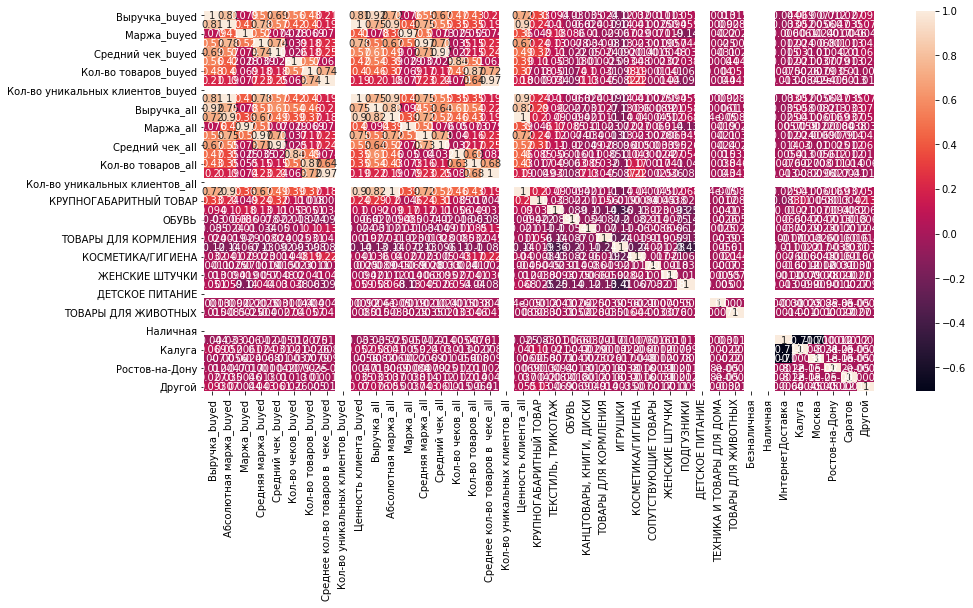

In [74]:
plt.style.context('seaborn');
fig = plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), annot=True)

In [ ]:
corr = df.drop(['Кол-во уникальных клиентов_buyed', 'Кол-во уникальных клиентов_all'], axis=1).corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

#### Смотрим на корреляцию, удаляем сильно коррелирующие колонки (одну из).

In [7]:
df = df.drop(['Выручка_buyed', 'Выручка_all', 'Средний чек_all', 'Среднее кол-во товаров в  чеке_all'],
             axis=1)

 #### Аутлайеры.

In [8]:
outliers = IsolationForest(n_estimators=20, random_state=0).fit_predict(df.values) # fit 3 trees
outliers = (outliers + 1) // 2
df = df.loc[np.array(df.index)[outliers == 1]]
df.shape

(43724, 37)

(56311, 42) -> (43724, 37)

#### Нормализация данных.

In [9]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)

### K-means

#### Количество кластеров для K-means определяется методом МЕТОД ЛОКТЯ.

In [21]:
score = []
for k in range(1, 11):
    kmeanModel = KMeans(n_clusters = k, max_iter=400, n_init=15, random_state=42).fit(X)
    score.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

No handles with labels found to put in legend.


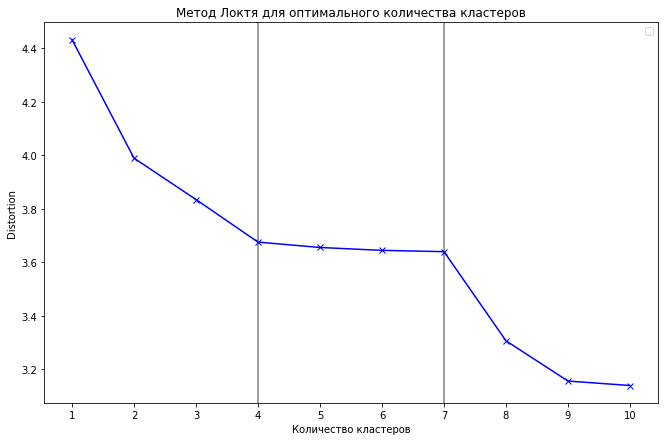

In [23]:
plt.figure(figsize=(11, 7))

plt.axvline(4, 0, 1, color='grey')
plt.axvline(7, 0, 1, color='grey')
K = range(1, 11)
plt.plot(K, score, 'bx-')

plt.xticks(np.arange(1, 11, step = 1))
plt.xlabel('Количество кластеров')
plt.ylabel('Distortion')
plt.title('Метод Локтя для оптимального количества кластеров')
plt.show()

#### Видим, что 4 это оптимальное количество кластеров для данных.

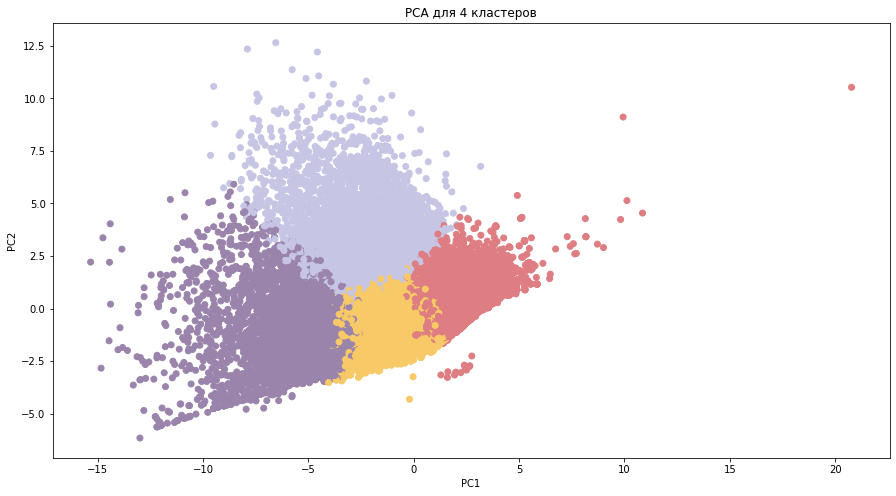

In [167]:
# Для PCA и сама модель K-means
Y_pca = PCA(n_components=2).fit_transform(X);
kmeanModel = KMeans(n_clusters = 4, max_iter=400, n_init=15, random_state=42).fit(X)

# График
np.random.seed(60)
colors = np.sqrt(np.random.randint(0, 270, size=(4, 3))/270)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(15, 8));
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA для 4 кластеров')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

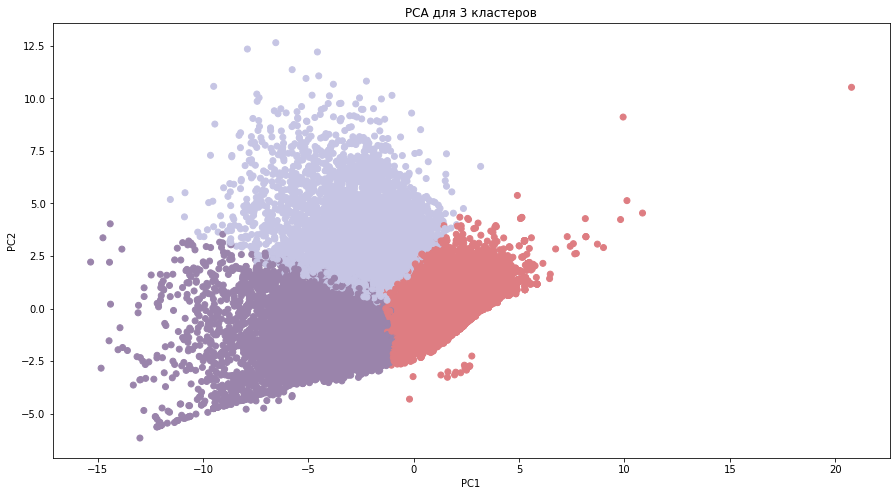

In [168]:
# Для PCA и сама модель K-means
Y_pca = PCA(n_components=2).fit_transform(X);
kmeanModel = KMeans(n_clusters = 3, max_iter=400, n_init=15, random_state=42).fit(X)

# График
np.random.seed(60)
colors = np.sqrt(np.random.randint(0, 270, size=(3, 3))/270)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(15, 8));
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA для 3 кластеров')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

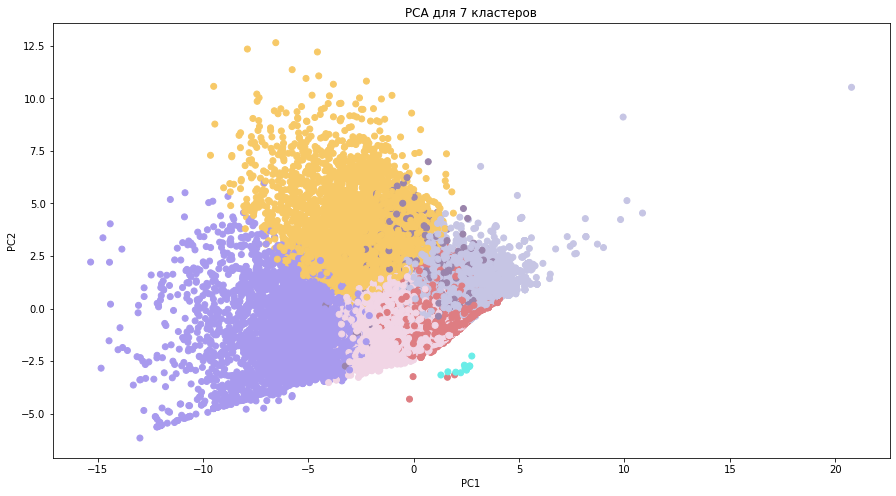

In [169]:
# Для PCA и сама модель K-means
Y_pca = PCA(n_components=2).fit_transform(X);
kmeanModel = KMeans(n_clusters = 7, max_iter=400, n_init=15, random_state=42).fit(X)

# График
np.random.seed(60)
colors = np.sqrt(np.random.randint(0, 270, size=(7, 3))/270)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(15, 8));
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA для 7 кластеров')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [3]:
vitrina_final = pd.read_csv('vitrina_final.csv', sep=';')

In [4]:
vitrina_final.to_excel('vitrina_final.xlsx', sheet_name='ИТОГ_ВИТРИНА')